# TITLE: **`ADIDAS SALES ANALYSIS ACROSS THE US`**
## 1. **Business Understanding**

- This projects aims to make a detailed analysis on US adidas sales

- In this project, we aim to find out:

a). What is the total sales revenue across all countries?  
b). Which region generates the highest profit, and which has the lowest?  
c). What is the sales contribution (%) of each market?   
d). How do monthly sales and profits vary across the year?  
e). Which months show the highest discounts given, and how does this impact profit?   
f). What are the top 5 most profitable product subcategories?   
g). Which product has the highest sales volume, and in which market is it sold the most?   
h). What is the average order value (AOV) for each customer segment?   
i). Which customer has the highest total sales, and what is their order frequency?   
j). Which city has the highest sales, and what is the associated profit margin?   
k). How do sales and profits vary across regions and countries?   
l). What is the overall discount percentage, and how does it affect profit margins?   
m). How many orders fall into negative profit, and which segments are affected the most?   
n). What is the profit-to-sales ratio for each product category and subcategory?   
o). Which market or region has the highest average order size (sales per order)?  
 

## 2. **Data Undertanding**

Here's a **table describing each column**:

| Column Name          | Description                                                               |
| -------------------- | ------------------------------------------------------------------------- |
| **Retailer**         | Name of the company or store selling the product                          |
| **Retailer ID**      | Unique identifier for each retailer                                       |
| **Invoice Date**     | Date when the sale was recorded or invoiced                               |
| **Region**           | Geographic region where the sale took place (e.g., East, West, etc.)      |
| **State**            | U.S. state where the sale occurred                                        |
| **City**             | City where the sale was made                                              |
| **Product**          | Name or type of product sold                                              |
| **Price per Unit**   | Price of a single unit of the product                                     |
| **Units Sold**       | Number of product units sold in the transaction                           |
| **Total Sales**      | Total revenue from the sale (Price per Unit × Units Sold)                 |
| **Operating Profit** | Profit made after subtracting operating costs from Total Sales            |
| **Operating Margin** | Operating Profit as a percentage of Total Sales                           |
| **Sales Method**     | Channel through which the product was sold (e.g., Online, In-store, etc.) |


In [239]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [240]:
# Load dataset
data = pd.read_excel("../Data Sets/Adidas US Sales Datasets.xlsx")


data.head()

,Unnamed: 0,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,NaN,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,NaN,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,NaN,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,NaN,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,NaN,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [241]:
# Check shape of data
print(f"The data has {data.shape[1]} columns and {data.shape[0]} rows")

The data has 14 columns and 9648 rows


In [242]:
# Check for data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        0 non-null      float64       
 1   Retailer          9648 non-null   object        
 2   Retailer ID       9648 non-null   int64         
 3   Invoice Date      9648 non-null   datetime64[ns]
 4   Region            9648 non-null   object        
 5   State             9648 non-null   object        
 6   City              9648 non-null   object        
 7   Product           9648 non-null   object        
 8   Price per Unit    9648 non-null   float64       
 9   Units Sold        9648 non-null   int64         
 10  Total Sales       9648 non-null   float64       
 11  Operating Profit  9648 non-null   float64       
 12  Operating Margin  9648 non-null   float64       
 13  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), fl

In [243]:
# Check for data index
data.index

RangeIndex(start=0, stop=9648, step=1)

In [244]:
# Drop the first irrelevant column - "Unnamed: 0"
data.drop("Unnamed: 0", axis=1, inplace=True)

data.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [245]:
# Check new shape of the data
print(f"The data has {data.shape[1]} columns and {data.shape[0]} rows")

The data has 13 columns and 9648 rows


In [246]:
# Check for null values in the dataset
for col in data.columns:
    print(f'There are {data[col].isna().sum()} null values in {col}')

There are 0 null values in Retailer
There are 0 null values in Retailer ID
There are 0 null values in Invoice Date
There are 0 null values in Region
There are 0 null values in State
There are 0 null values in City
There are 0 null values in Product
There are 0 null values in Price per Unit
There are 0 null values in Units Sold
There are 0 null values in Total Sales
There are 0 null values in Operating Profit
There are 0 null values in Operating Margin
There are 0 null values in Sales Method


In [247]:
# Check for duplicates in the dataset
print(f"There are {data.duplicated().sum()} duplicates in the dataset")

There are 0 duplicates in the dataset


In [248]:
# Describe the numerical columns in the dataset
data.describe().T.style.format("{:,.2f}")

,count,mean,min,25%,50%,75%,max,std
Retailer ID,"9,648.00","1,173,849.72","1,128,299.00","1,185,732.00","1,185,732.00","1,185,732.00","1,197,831.00","26,360.38"
Invoice Date,"9,648.00",",.2f",",.2f",",.2f",",.2f",",.2f",",.2f",nan
Price per Unit,"9,648.00",45.22,7.00,35.00,45.00,55.00,110.00,14.71
Units Sold,"9,648.00",256.93,0.00,106.00,176.00,350.00,"1,275.00",214.25
Total Sales,"9,648.00","93,273.44",0.00,"4,254.50","9,576.00","150,000.00","825,000.00","141,916.02"
Operating Profit,"9,648.00","34,425.24",0.00,"1,921.75","4,371.42","52,062.50","390,000.00","54,193.11"
Operating Margin,"9,648.00",0.42,0.10,0.35,0.41,0.49,0.80,0.10


In [249]:
# Describe the objaect columns in the dataset
data.describe(include="O").T.style.format({
    'count': '{:,}',
    'freq': '{:,}'
})

,count,unique,top,freq
Retailer,"9,648",6,Foot Locker,"2,637"
Region,"9,648",5,West,"2,448"
State,"9,648",50,Texas,432
City,"9,648",52,Portland,360
Product,"9,648",6,Men's Street Footwear,"1,610"
Sales Method,"9,648",3,Online,"4,889"


## **Exploratory Data Analysis**

### **Check for Outliers**

In [250]:
# Check for outliers in the numerical columns
num_cols = data.select_dtypes(exclude="O")

num_cols.columns

Index(['Retailer ID', 'Invoice Date', 'Price per Unit', 'Units Sold',
       'Total Sales', 'Operating Profit', 'Operating Margin'],
      dtype='object')

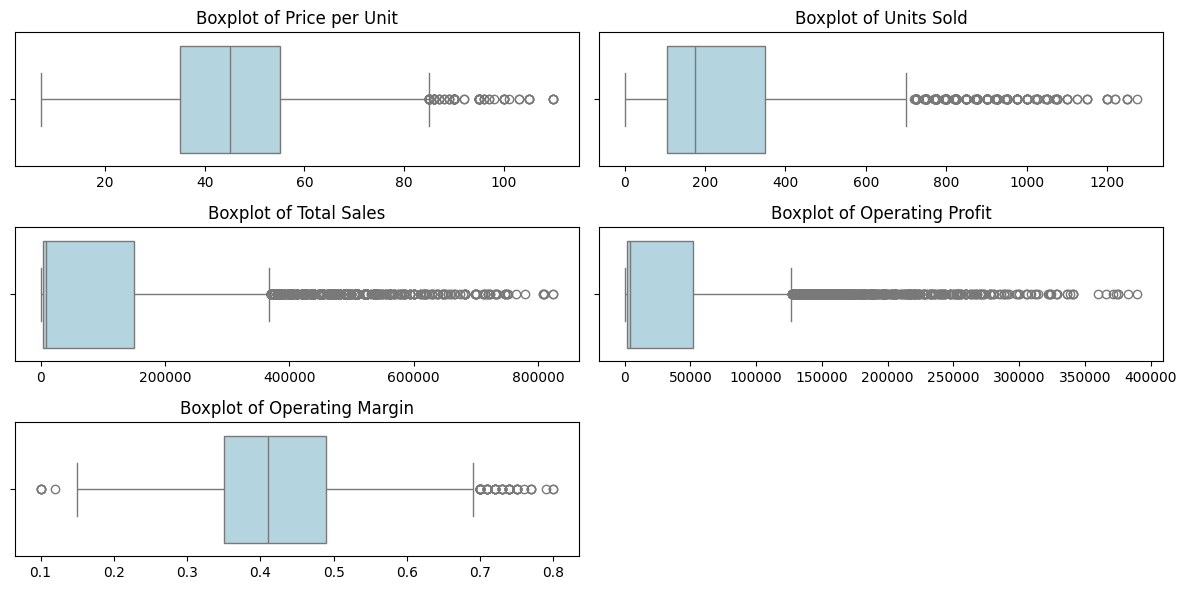

In [251]:
# Get only relevant columns from the numerical columns
rel_cols = ['Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin']

# Create 2x2 subplots + 1 extra row
fig, axs = plt.subplots(3, 2, figsize=(12, 6)) 

axs = axs.flatten()  # Flatten to make it easier to loop through

# Plot each boxplot
for i, col in enumerate(rel_cols):
    sns.boxplot(x=data[col], ax=axs[i], color='lightblue')
    axs[i].set_title(f'Boxplot of {col}')
    axs[i].set_xlabel('')  

# Hide the unused sixth subplot
if len(rel_cols) < len(axs):
    axs[-1].axis('off')

plt.tight_layout()
plt.show()

## **Notes**

- All the columns have outliers. This means there could be underlyig causes such as changes in behavior or business processes which call for more examination to clearly arrive at a logical conlusion

Causes of action:
- Investigate first: Understand why they exist

- Fix or remove: If they’re errors

- Cap or transform: Use log-scaling, winsorization, etc.

- Keep: If they reflect real and important variation

### **Check for unique values in categorical columns**

In [252]:
# Get Unique categories in the categorical variables
cat_cols = data.select_dtypes(include="O").columns

for col in cat_cols:
    print(f"Unique values in '{col}':")
    print(data[col].unique())
    print("=" * 25)

Unique values in 'Retailer':
['Foot Locker' 'Walmart' 'Sports Direct' 'West Gear' "Kohl's" 'Amazon']
Unique values in 'Region':
['Northeast' 'South' 'West' 'Midwest' 'Southeast']
Unique values in 'State':
['New York' 'Texas' 'California' 'Illinois' 'Pennsylvania' 'Nevada'
 'Colorado' 'Washington' 'Florida' 'Minnesota' 'Montana' 'Tennessee'
 'Nebraska' 'Alabama' 'Maine' 'Alaska' 'Hawaii' 'Wyoming' 'Virginia'
 'Michigan' 'Missouri' 'Utah' 'Oregon' 'Louisiana' 'Idaho' 'Arizona'
 'New Mexico' 'Georgia' 'South Carolina' 'North Carolina' 'Ohio'
 'Kentucky' 'Mississippi' 'Arkansas' 'Oklahoma' 'Kansas' 'South Dakota'
 'North Dakota' 'Iowa' 'Wisconsin' 'Indiana' 'West Virginia' 'Maryland'
 'Delaware' 'New Jersey' 'Connecticut' 'Rhode Island' 'Massachusetts'
 'Vermont' 'New Hampshire']
Unique values in 'City':
['New York' 'Houston' 'San Francisco' 'Los Angeles' 'Chicago' 'Dallas'
 'Philadelphia' 'Las Vegas' 'Denver' 'Seattle' 'Miami' 'Minneapolis'
 'Billings' 'Knoxville' 'Omaha' 'Birmingham' 'Po

### **Check for Distribution of numerical columns**

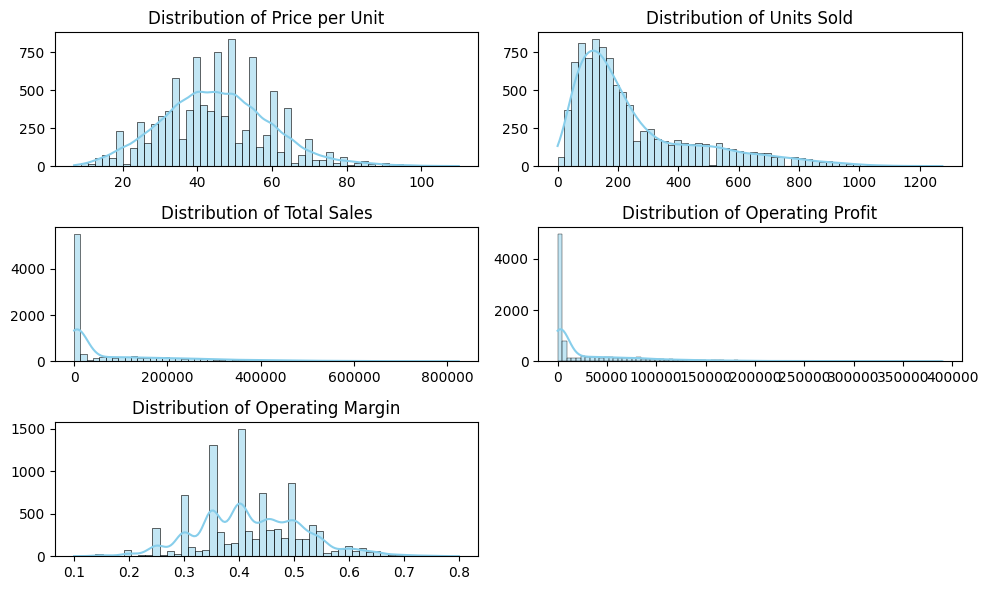

In [253]:
# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 6))
axs = axs.flatten()

# Plot each histogram
for i, col in enumerate(rel_cols):
    sns.histplot(data[col], ax=axs[i], color='skyblue', kde=True)
    axs[i].set_title(f'Distribution of {col}')
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')

# Turn off unused subplots (if fewer than 6 columns)
for j in range(len(rel_cols), len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


## Notes
- Price per Unit and Operating Margin both follow a distribution that is approximately normal, though not perfectly. They show a bell-shaped curve with slight deviations from symmetry.

- Total Sales, Operating Profit, and Units Sold are all right-skewed, meaning the majority of values are clustered on the lower end, with a long tail extending to the right.

- This indicates that while most transactions are relatively modest in value and volume, there are a few high-performing entries (possibly large orders or high-revenue items) that significantly raise the upper range of the data.

### **Final notes about the data**

- The data is majorly clean however we will continue to monitor it closely for any data modelling requirements during our analysis


## 3. **Data Preparation**

In [254]:
# Add Year, Month, week and day columns in the dataset
data["Invoice Date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9648 entries, 0 to 9647
Series name: Invoice Date
Non-Null Count  Dtype         
--------------  -----         
9648 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 75.5 KB


In [255]:
# Add year
data['Year'] = data["Invoice Date"].dt.year

# Add month
data["Month"] = data["Invoice Date"].dt.month_name()

# Add of the week
data["Day of Week"] = data["Invoice Date"].dt.day_name()

# Add of the Month
data["Day of Month"] = data["Invoice Date"].dt.day

data.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Year,Month,Day of Week,Day of Month
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store,2020,January,Wednesday,1
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store,2020,January,Thursday,2
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store,2020,January,Friday,3
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store,2020,January,Saturday,4
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store,2020,January,Sunday,5


# **`Analytical Questions`**

### 1. What is the total sales revenue across all countries?  

In [256]:
# Calculate total sales revenue across the US
total_sales = data["Total Sales"].sum()
print(f"Total Sales: ${total_sales:,.2f}")

Total Sales: $899,902,125.00


In [260]:
# Convert to DataFrame
year_total_sales = data.groupby("Year")["Total Sales"].sum()
year_total_sales_df = year_total_sales.reset_index()
year_total_sales_df.columns = ['Year', 'Total Sales']

# Format Total Sales column
year_total_sales_df.style.format({"Total Sales": "{:,.0f}"})


,Year,Total Sales
0,2020,"182,080,675"
1,2021,"717,821,450"


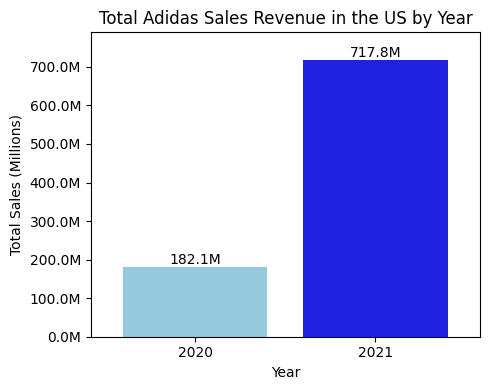

In [287]:
# Convert Series to DataFrame
df = year_total_sales.reset_index()
df.columns = ['Year', 'Total Sales']

# Convert to millions
df['Total Sales (M)'] = df['Total Sales'] / 1_000_000

plt.figure(figsize=(5, 4))
ax = sns.barplot(data=df, x='Year', y='Total Sales (M)', palette=["skyblue", "blue"])
plt.title("Total Adidas Sales Revenue in the US by Year")

# Add data labels in M
for i, v in enumerate(df['Total Sales (M)']):
    plt.text(i, v, f'{v:.1f}M', ha='center', va='bottom')

# Format y-axis ticks to show M
ax.set_ylabel("Total Sales (Millions)")
ax.set_yticklabels([f'{x:.1f}M' for x in ax.get_yticks()])

plt.margins(x=0.1, y=0.1)
plt.tight_layout()
plt.show()


## Notes
-  In 2020 and 2021, Adidas made **$899,902,125** in total sales revenue in the US
- in 2020, Adidas made **$182,080,675** and in 2021 **$717,821,450** showing a great improvement in total sales revenue by **+ $535, 740, 775**

### 2.  Which region generates the highest profit, and which has the lowest? 

In [ ]:
# Calculate operating profit for all the region
region_profit = data.groupby("Region")["Operating Profit"].sum().sort_values(ascending=False).reset_index()

region_profit.style.format({"Operating Profit": "{:,.2f}"})

,Region,Operating Profit
0,West,"89,609,406.55"
1,Northeast,"68,020,587.65"
2,South,"61,138,004.07"
3,Southeast,"60,555,416.70"
4,Midwest,"52,811,346.48"


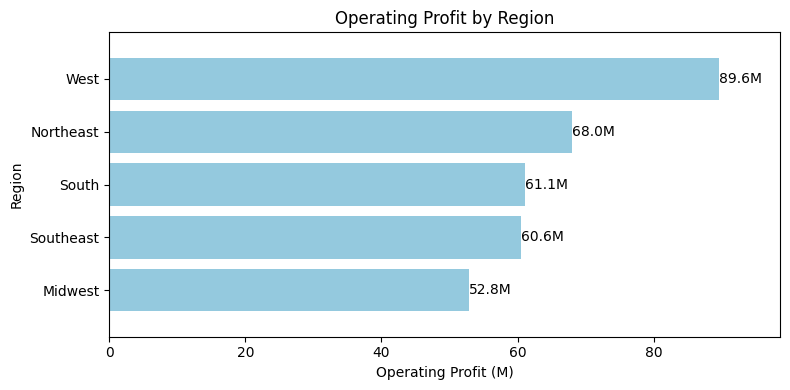

In [312]:
# Convert profit to millions
region_profit["Profit_M"] = region_profit["Operating Profit"] / 1_000_000

plt.figure(figsize=(8, 4))
ax = sns.barplot(y=region_profit['Region'], x=region_profit["Profit_M"], color="skyblue")
plt.title("Operating Profit by Region")
plt.xlabel("Operating Profit (M)")

# Add data labels
for i, v in enumerate(region_profit["Profit_M"]):
    plt.text(v, i, f'{v:.1f}M', va='center')

plt.margins(x=0.1, y=0.1)
plt.tight_layout()
plt.show()

### Notes 

-  The region with the highest operating profit is the **west** with **$89.6M**

- Region with the lowest operating profit margin is **Midwest** with **$52.8**

- Overall, all the regions are above the **50m** profit mark total(2020 and 2021)

In [ ]:
# Calculate operating profit by year and Region
region_profit = (
    data.groupby(["Region", "Year"])["Operating Profit"]
    .sum()
    .reset_index()
    .sort_values(by=["Region", "Year", "Operating Profit"], ascending=[False, False, True])
)

region_profit.style.format({"Operating Profit": "{:,.2f}"})


,Region,Year,Operating Profit
9,West,2021,"65,140,528.21"
8,West,2020,"24,468,878.34"
7,Southeast,2021,"48,386,797.59"
6,Southeast,2020,"12,168,619.11"
5,South,2021,"51,292,863.01"
4,South,2020,"9,845,141.06"
3,Northeast,2021,"53,797,793.34"
2,Northeast,2020,"14,222,794.31"
1,Midwest,2021,"50,141,116.72"
0,Midwest,2020,"2,670,229.76"


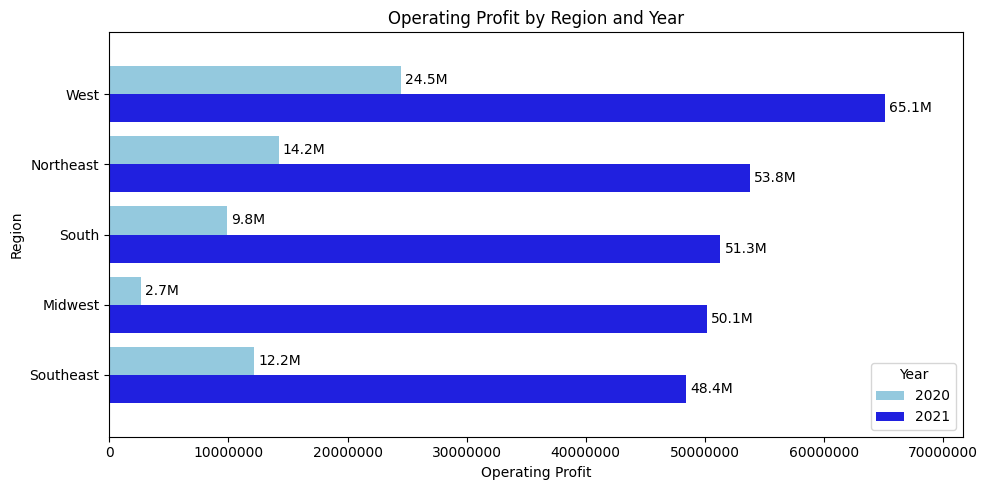

In [326]:
# Sort regions by 2021 operating profit for clearer order in the chart
order_2021 = (
    region_profit[region_profit["Year"] == 2021]
    .sort_values("Operating Profit", ascending=False)["Region"]
    .tolist()
)

# Create grouped horizontal bar plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=region_profit,
    x="Operating Profit",
    y="Region",
    hue="Year",
    palette=["skyblue", "blue"],
    order=order_2021  # Sort by 2021 profits
)

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1fM', label_type='edge', padding=3,
                 labels=[f"{v.get_width() / 1_000_000:.1f}M" for v in container])

plt.margins(x=0.1, y=0.1)
plt.title("Operating Profit by Region and Year")
plt.xlabel("Operating Profit")
plt.ticklabel_format(style='plain', axis='x')  # Suppress scientific notation
plt.tight_layout()
plt.show()


## Notes

- Profit by year is distributed closely mirroring the overall profit - Region west topped both in 2020 and and 2021 by profit margin. South east is the lowest in 2021 and overall although midwest had the lowest profit in 2020

### 3. What is the sales contribution (%) of each market?

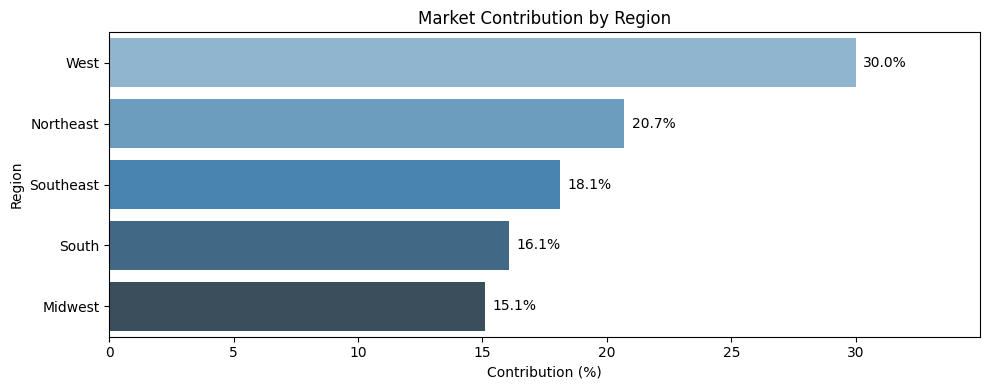

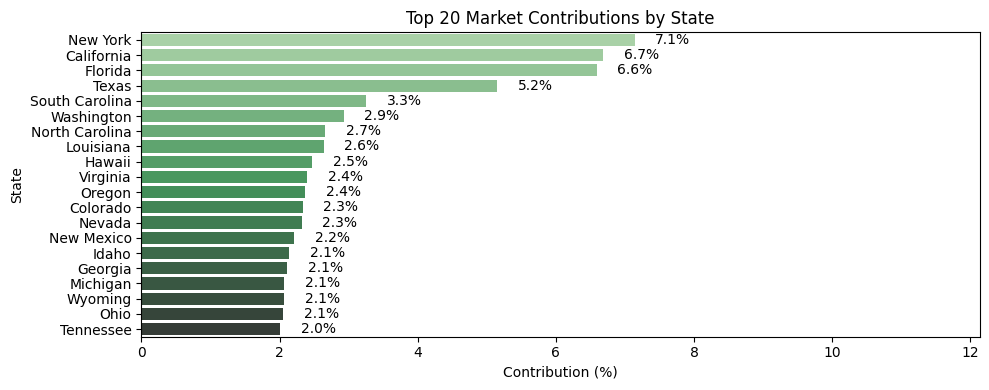

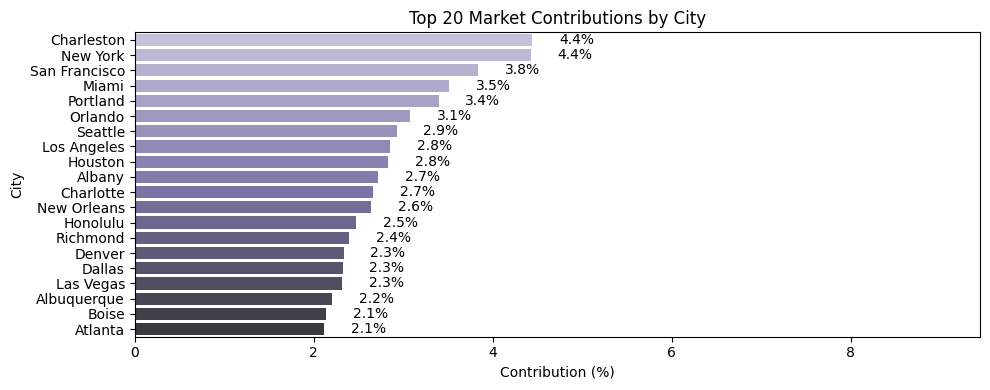

In [347]:
# 1. Calculate total sales
total_sales = data["Total Sales"].sum()

# 2. Group by Region, State, City and calculate contribution
region_contrib = data.groupby("Region")["Total Sales"].sum().reset_index()
state_contrib = data.groupby("State")["Total Sales"].sum().reset_index()
city_contrib = data.groupby("City")["Total Sales"].sum().reset_index()

# 3. Compute percentage contribution
region_contrib["Contribution (%)"] = (region_contrib["Total Sales"] / total_sales) * 100
state_contrib["Contribution (%)"] = (state_contrib["Total Sales"] / total_sales) * 100
city_contrib["Contribution (%)"] = (city_contrib["Total Sales"] / total_sales) * 100

# 4. Sort and filter
region_contrib = region_contrib.sort_values("Contribution (%)", ascending=False)
state_contrib = state_contrib.sort_values("Contribution (%)", ascending=False).head(20)
city_contrib = city_contrib.sort_values("Contribution (%)", ascending=False).head(20)

# 5. Helper function for plotting
def plot_contribution(df, y_col, title, color):
    plt.figure(figsize=(10, 4))
    ax = sns.barplot(data=df, x="Contribution (%)", y=y_col, palette=color)

    # Add data labels
    for i, v in enumerate(df["Contribution (%)"]):
        ax.text(v + 0.3, i, f'{v:.1f}%', va='center', fontsize=10)

    plt.title(title)
    plt.xlabel("Contribution (%)")
    plt.xlim(0, df["Contribution (%)"].max() + 5)  # Add buffer
    plt.tight_layout()
    plt.show()

# 6. Generate plots
plot_contribution(region_contrib, "Region", "Market Contribution by Region", "Blues_d")
plot_contribution(state_contrib, "State", "Top 20 Market Contributions by State", "Greens_d")
plot_contribution(city_contrib, "City", "Top 20 Market Contributions by City", "Purples_d")


### Notes
By grouping market sharing Region, state and city, we find that:

1. Region
- Region West and Northeast have the largest share of the market with a share of 30% and 20% respectively. 
- Region West is therefore by far the biggest Adidas market in the US

2. State
- New York state, California, Florida and Texas have the biggest market share  each having greater that 5% share of the market
- New york has the biggest share with 7.1% share, California second with 6.7% Florida third with 6.6% and Texas with 5.2%

3. City
- Charleston city, New York city, San Francisco, Miami and Portland have the biggest market shares having more than 3% market share

